In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
US_comments = pd.read_csv("C:/Users/user/Desktop/Abayomi's data/1-Youtube Text Data Analysis/UScomments.csv", error_bad_lines=False)
US_comments.head()

b'Skipping line 41589: expected 4 fields, saw 11\nSkipping line 51628: expected 4 fields, saw 7\nSkipping line 114465: expected 4 fields, saw 5\n'
b'Skipping line 142496: expected 4 fields, saw 8\nSkipping line 189732: expected 4 fields, saw 6\nSkipping line 245218: expected 4 fields, saw 7\n'
b'Skipping line 388430: expected 4 fields, saw 5\n'
C:\Users\user\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


video_id                                       comment_text likes  \
0  XpVt6Z1Gjjo                  Logan Paul it's yo big day ‼️‼️‼️     4   
1  XpVt6Z1Gjjo  I've been following you from the start of your...     3   
2  XpVt6Z1Gjjo                 Say hi to Kong and maverick for me     3   
3  XpVt6Z1Gjjo                                MY FAN . attendance     3   
4  XpVt6Z1Gjjo                                         trending 😉     3   

  replies  
0       0  
1       0  
2       0  
3       0  
4       0

In [3]:
from textblob import TextBlob 

In [4]:
TextBlob("MY FAN . attendance").sentiment.polarity

0.0

In [5]:
polarity = []
for i in US_comments["comment_text"]:
    try:
        polarity.append(TextBlob(i).sentiment.polarity)
    except:
        polarity.append(0)

In [6]:
US_comments["polarity"] = polarity

In [7]:
US_comments.head()

video_id                                       comment_text likes  \
0  XpVt6Z1Gjjo                  Logan Paul it's yo big day ‼️‼️‼️     4   
1  XpVt6Z1Gjjo  I've been following you from the start of your...     3   
2  XpVt6Z1Gjjo                 Say hi to Kong and maverick for me     3   
3  XpVt6Z1Gjjo                                MY FAN . attendance     3   
4  XpVt6Z1Gjjo                                         trending 😉     3   

  replies  polarity  
0       0       0.0  
1       0       0.0  
2       0       0.0  
3       0       0.0  
4       0       0.0

In [9]:
positive_comments = US_comments[US_comments["polarity"]==1]
positive_comments.head()

video_id                                       comment_text likes  \
64   XpVt6Z1Gjjo                                    yu are the best     1   
156  cLdxuaxaQwc  Power is the disease.  Care is the cure.  Keep...     0   
227  WYYvHb03Eog  YAS Can't wait to get it! I just need to sell ...     0   
307  sjlHnJvXdQs                                  This is priceless     0   
319  sjlHnJvXdQs                                Summed up perfectly     0   

    replies  polarity  
64        0       1.0  
156       0       1.0  
227       0       1.0  
307       0       1.0  
319       0       1.0

In [10]:
negative_comments = US_comments[US_comments["polarity"]==-1]
negative_comments.head()

video_id                                       comment_text likes  \
512   8wNr-NQImFg  BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...     0   
562   8wNr-NQImFg  Well… The brain surgeon Ben Carson just proved...     0   
952   Ayb_2qbZHm4         WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!!     0   
1371  vu_9muoxT50                                     WTF BRUH!!!!!!     0   
1391  vu_9muoxT50                    cheeseus christ thats insane!!!     0   

     replies  polarity  
512        0      -1.0  
562        0      -1.0  
952        0      -1.0  
1371       0      -1.0  
1391       0      -1.0

In [11]:
total_positive_comments = (" ".join(positive_comments["comment_text"]))

In [12]:
len(total_positive_comments)

846560

In [13]:
total_negative_comments = (" ".join(negative_comments["comment_text"]))

In [14]:
len(total_negative_comments)

190787

In [15]:
from wordcloud import WordCloud, STOPWORDS

(-0.5, 999.5, 499.5, -0.5)

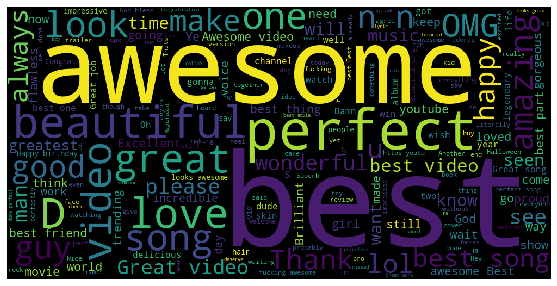

In [16]:
wordcloud = WordCloud(width=1000, height=500, stopwords=set(STOPWORDS)).generate(total_positive_comments)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis("off")

(-0.5, 999.5, 499.5, -0.5)

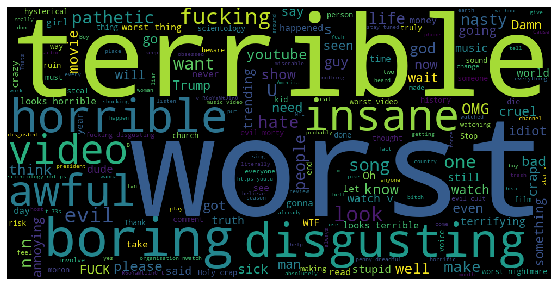

In [17]:
wordcloud = WordCloud(width=1000, height=500, stopwords=set(STOPWORDS)).generate(total_negative_comments)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis("off")

In [18]:
US_comments.head()

video_id                                       comment_text likes  \
0  XpVt6Z1Gjjo                  Logan Paul it's yo big day ‼️‼️‼️     4   
1  XpVt6Z1Gjjo  I've been following you from the start of your...     3   
2  XpVt6Z1Gjjo                 Say hi to Kong and maverick for me     3   
3  XpVt6Z1Gjjo                                MY FAN . attendance     3   
4  XpVt6Z1Gjjo                                         trending 😉     3   

  replies  polarity  
0       0       0.0  
1       0       0.0  
2       0       0.0  
3       0       0.0  
4       0       0.0

In [19]:
US_comments["comment_text"].isna().sum()

25

In [21]:
US_comments.comment_text = US_comments["comment_text"].fillna("o")

In [22]:
US_comments["comment_text"].isna().sum()

0

In [23]:
US_comments["comment_text"][4]

'trending 😉'

In [24]:
import emoji

In [25]:
comments = "trending 😉"
[c for c in comments if c in emoji.UNICODE_EMOJI]
str = " "
for i in US_comments["comment_text"]:
    list = [c for c in i if c in emoji.UNICODE_EMOJI]
    for ele in list:
        str = str + ele
print(str)

 ‼‼‼😉😭👍🏻❤😍💋💙👍👈😂🔥😂😂😂😂👻❤😂❤💎😆😆😆😆😆😆😁😁😁😁😁😁😁😂😂😂😂😭😒👏👏👏👏👏👏👏👏👏👏😊❤👈😂😂👌👌🤔👈😂😂😁💔😂👎👎👎👎👎🍎😤😂😂😂😂👈😭😭😭😢😢😢😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂💋💋👫💘😻💋💋💖💖💖💖💖💖💖💖💖💖💖💖💖💖🌟🌟😮😮😮😮😮😮😮😮😮👈😊👇🏻😳😳❤👈😠😆😂😆😂😆😊😠😴😴😴😴👈🤔😂😝😂😂😂👍😂™👈☺😔😩😩😡😍😍😍😍😍😍😂🙏🏻😄☺😬😊👍🏻😊☹🤷🤣🤣🤣🤣😃😃😃😃👌🏽🍏🍎😓😂😂🤣🤣❤❤😂🤦🏽♀😞😂🙏🏼😂😂😂✌😂😂😂😂😂😂😂😂😂😂😊😂😂😂😂😂😂😔😂😂😂😂😭😭😭😭💀😂😂👀😂😂😂😱❤😂😂😂😂😂😂😂😂😂❤❤👑👑👑😂😂😍😍😍🌮🌮🌮🌮🌮😂😀😂😂😂😂😂😂😂💆🏿♂🔥👏👏👏😊😅😆😆😆😆😂😂😂😂😂😂🌟🌟😮😮😮😮😮😮😮😮😮😂😂😂😂❤❤❤🐂💩💕😉😍😍😍😍❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤💓💓💓💓💓💓💓❤❤❤❤❤❤❤❤❤💗💗😢💝💝❤💙😭❤🙏❤😍😍😍😍😍💜💜💜😎😂❤😊😒😱👏👏👏😎😱😱😱😱🎉🤔😂😂😂😂😋😋😍😍😍😘😱😳😘😘😍😍😐😉😍😊😕😄😞🔥🔥🔥🔥🔥🤘🏻😱😱😂😊😭😂😂😍👍😆🙌🙌🙌🌟🌟😮😮😮😮😮😮😮😮😮👍🏼💕😀😂😂😂😂😂😂😂😊😂😂😂😂😏😏🇪🇸😊😛🌳🌽🎃🚣🚂😂😂😊😕😋🤣😅😢💔😊😂😂😍💋💋👫💘😻💋💋😂👑🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥😂😐😑😩👌🏻🔥💖👏🏻👀✨👅💦💕🔥🔥🔥❤❤❤❤❤❤❤👌😍😍😍😞🌴💜💜💜💜😍😍😍😍😍❤❤❤❤❤😞💕😫😥👍💪😂😂😂😂😂😂😊😊😊😊😂😊😂😂😂😂😂😂😂😂😂😂🙏🏻❤🙏🙏🙏😓❤🇨🇺😂🙂🙂💋💋👫💘😻💋💋😊💖💖💖❤😎😎✌😀😀😀😀😊😊❤❤❤❤😊😄🙈😻😂😂😂🙌🏻🤘❤😂❤🤣🤣🤣🤣🤣🤣😂😂😂😂😂😂😊😊😊😊😲😍❤😘😘😘😘😘❤❤😂❤❤❤❤😍😍😍😍😍😍😍😍😍💕🤢🤢🤢👍👍👍👍👍👍👍👍👍👍👍🎧🎶🎵🎼🎤✌💪👏👏👏👏👏👏👌♨💯🔥🔥🔥🔥🔥🔥🔥🔥🔥👌👍💪👊✌😊😍😎😁💏💖😂😂😊🙃😂😂😂😂😂🤣😂😂😂😅😅😂🐸😂😂🏈💁🏼😂😊🤡🙏🙏🙏👊🏿🙇🏽👋😅😅😅😅😂😂🤔😊😍😎💄🐐😊🤡💖💖💖❤😂😂😂😻😻😻😄😍😍😍😍😍🤣😂😇👌🏻😂☺😀😂❤😂😂😂😂😂😂😂😂😳❤🐊👀❤🌎😂❤❤😍😊😊😎🤘🖤👌👌😅😂😂😊😊👀👌🏽❤😂😊🤣😂😂👍😍😍😕😂😏❤❤🔥🔥❤😍😍😍😍😍😊🤗😊🙄😍😨😍😍😍😍😎😃😂😍😏😌😂😎🤑😂😍😍😍👍👍😗👍🏼👍🏼😂❤😻😻😓😲😢😊😊😂😍😍😊😬😍💗💖💖😂😂😂💖😆😆😆😘😘😘❤❤🔥😂😂😂😂😂😊😂😂📱📱📱📱📱📱📱📱📱📱📱😇😇😇😳😕😕😕😕😊

In [26]:
len(str)

304746

In [27]:
len(set(str))

1124

In [28]:
res = { i:str.count(i) for i in set(str)}

In [29]:
res

{'🍨': 24,
 '↔': 5,
 '🔀': 7,
 '🚙': 14,
 '🥁': 23,
 '🐰': 38,
 '👹': 49,
 '🐈': 34,
 '⛲': 9,
 '📷': 22,
 '⏮': 3,
 '🚳': 6,
 '👐': 147,
 '⏬': 4,
 '👯': 49,
 '🥃': 13,
 '🍘': 7,
 '➗': 3,
 '🈺': 4,
 '🍝': 26,
 '♈': 8,
 '📛': 10,
 '🌥': 4,
 '⚱': 7,
 '👃': 27,
 '💣': 197,
 '🔱': 16,
 '🚯': 7,
 '👷': 15,
 '🐀': 12,
 '🚋': 10,
 '🥙': 6,
 '🐉': 30,
 '◽': 3,
 '📱': 231,
 '🍉': 97,
 '🤯': 6,
 '👪': 14,
 '👊': 379,
 '📜': 8,
 '☔': 7,
 '🔶': 103,
 '👈': 126,
 '🇷': 1421,
 '⭕': 22,
 '🦍': 4,
 '😐': 644,
 '🕜': 4,
 '🈳': 10,
 '🦏': 4,
 '🖌': 3,
 '🌦': 7,
 '❇': 18,
 '🌽': 36,
 '😙': 1067,
 '🚧': 4,
 '⏯': 2,
 '🚘': 12,
 '🍥': 22,
 '➖': 11,
 '🚪': 57,
 '🇮': 242,
 '🔰': 14,
 '😃': 1235,
 '😶': 176,
 '💊': 14,
 '🏯': 7,
 '☄': 27,
 '🗽': 20,
 '🥓': 12,
 '🔝': 143,
 '🚗': 13,
 '🍬': 91,
 '💑': 125,
 '📔': 7,
 '🇻': 81,
 '😇': 640,
 '😌': 338,
 '🎬': 31,
 '👳': 26,
 '🎢': 16,
 '🚊': 5,
 '😟': 122,
 '📕': 8,
 '🏩': 6,
 '🔐': 25,
 '🤹': 7,
 '🏖': 4,
 '🐓': 129,
 '💈': 7,
 '📭': 9,
 '🚲': 12,
 '〰': 290,
 '🤳': 8,
 '🚟': 4,
 '☕': 75,
 '👒': 12,
 '🎄': 97,
 '🆙': 10,
 '👬': 32,
 '💖': 5359,
 '

In [30]:
res = {k:v for k,v in sorted(res.items(), key=lambda item: item[1])}
res

{'♾': 1,
 '🤟': 1,
 ' ': 1,
 '🧢': 1,
 '🤪': 1,
 '🤬': 1,
 '🤭': 1,
 '⏯': 2,
 '☦': 2,
 '☣': 2,
 '⏭': 2,
 '🔟': 2,
 '🤨': 2,
 '⚒': 2,
 '⏸': 2,
 '🛢': 2,
 '⏺': 2,
 '⚙': 2,
 '🖲': 2,
 '⚗': 2,
 '🎏': 2,
 '⏹': 2,
 '🗄': 2,
 '🏷': 2,
 '🖨': 2,
 '⏮': 3,
 '➗': 3,
 '◽': 3,
 '🖌': 3,
 '🖇': 3,
 '🚏': 3,
 '🕹': 3,
 '🏑': 3,
 '🔳': 3,
 '🏮': 3,
 '🔖': 3,
 '🛶': 3,
 '🧐': 3,
 '🛩': 3,
 '🗜': 3,
 '🗒': 3,
 '🛣': 3,
 '🎎': 3,
 '🕳': 3,
 '⛰': 3,
 '🤺': 3,
 '⏲': 3,
 '◼': 3,
 '🗓': 3,
 '🚕': 3,
 '☸': 3,
 '🗞': 3,
 '◻': 3,
 '🏎': 3,
 '☂': 3,
 '🕉': 3,
 '💹': 3,
 '⚛': 3,
 '🗳': 3,
 '🗂': 3,
 '🗃': 3,
 '📴': 3,
 '⏬': 4,
 '🈺': 4,
 '🌥': 4,
 '🦍': 4,
 '🕜': 4,
 '🦏': 4,
 '🚧': 4,
 '🏖': 4,
 '🚟': 4,
 '🚃': 4,
 '🈂': 4,
 '🕘': 4,
 '◾': 4,
 '🎚': 4,
 '🛫': 4,
 '🕗': 4,
 '🔹': 4,
 '🕠': 4,
 '🔗': 4,
 '🏘': 4,
 '🕒': 4,
 '🆔': 4,
 '🔲': 4,
 '✡': 4,
 '🚉': 4,
 '🏤': 4,
 '🈷': 4,
 'Ⓜ': 4,
 '🕍': 4,
 '⏫': 4,
 '🎛': 4,
 '🖊': 4,
 '⌨': 4,
 '🚚': 4,
 '🥜': 4,
 '🔃': 4,
 '🈸': 4,
 '🎞': 4,
 '➿': 4,
 '☪': 4,
 '🆚': 4,
 '🌫': 4,
 '🕚': 4,
 '🛬': 4,
 '🛳': 4,
 '🚎': 4,
 '⛏': 4,
 '🎐': 4,
 '🌘': 4,
 

In [31]:
keys = [*res.keys()]
values = [*res.values()]

In [32]:
keys[0]

'♾'

In [33]:
df = pd.DataFrame({"chars":keys[-20:], "num":values[-20:]})
df

chars    num
0      🤣   2279
1      🏼   2549
2      😢   2672
3      💙   2831
4      👌   3112
5      😬   3381
6      💜   3429
7      🏻   3438
8      😊   3596
9      ♥   4909
10     💕   5147
11     💖   5359
12     👍   5476
13     😘   5545
14     👏   5719
15     😭   8398
16     🔥   8694
17     ❤  31119
18     😍  33453
19     😂  36987

In [34]:
import plotly.graph_objs as go
from plotly.offline import iplot

In [35]:
trace = go.Bar(x=df["chars"],y=df["num"])
iplot([trace])

In [36]:
US_videos = pd.read_csv("C:/Users/user/Desktop/Abayomi's data/1-Youtube Text Data Analysis/USvideos.csv", error_bad_lines=False)
US_videos.head()

b'Skipping line 2401: expected 11 fields, saw 21\nSkipping line 2800: expected 11 fields, saw 21\nSkipping line 5297: expected 11 fields, saw 12\nSkipping line 5299: expected 11 fields, saw 12\nSkipping line 5300: expected 11 fields, saw 12\nSkipping line 5301: expected 11 fields, saw 12\n'


video_id                                              title  \
0  XpVt6Z1Gjjo  1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...   
1  K4wEI5zhHB0            iPhone X — Introducing iPhone X — Apple   
2  cLdxuaxaQwc                                        My Response   
3  WYYvHb03Eog                          Apple iPhone X first look   
4  sjlHnJvXdQs                                  iPhone X (parody)   

      channel_title  category_id  \
0  Logan Paul Vlogs           24   
1             Apple           28   
2         PewDiePie           22   
3         The Verge           28   
4        jacksfilms           23   

                                                tags    views   likes  \
0  logan paul vlog|logan paul|logan|paul|olympics...  4394029  320053   
1  Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...  7860119  185853   
2                                             [none]  5845909  576597   
3  apple iphone x hands on|Apple iPhone X|iPhone ...  2642103   24975   
4  jacksfilms|parody|parodies|iphone|iphone x|iph...  1168130   96666   

   dislikes  comment_total                                  thumbnail_link  \
0      5931          46245  https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg   
1     26679              0  https://i.ytimg.com/vi/K4wEI5zhHB0/default.jpg   
2     39774         170708  https://i.ytimg.com/vi/cLdxuaxaQwc/default.jpg   
3      4542          12829  https://i.ytimg.com/vi/WYYvHb03Eog/default.jpg   
4       568           6666  https://i.ytimg.com/vi/sjlHnJvXdQs/default.jpg   

    date  
0  13.09  
1  13.09  
2  13.09  
3  13.09  
4  13.09

In [37]:
US_videos.columns

Index(['video_id', 'title', 'channel_title', 'category_id', 'tags', 'views',
       'likes', 'dislikes', 'comment_total', 'thumbnail_link', 'date'],
      dtype='object')

In [41]:
tags_complete = (" ".join(US_videos["tags"]))

In [42]:
US_videos["tags"][0]

'logan paul vlog|logan paul|logan|paul|olympics|logan paul youtube|vlog|daily|comedy|hollywood|parrot|maverick|bird|maverick clothes|diamond play button|logan paul diamond play button|10M subscribers|logan paul 1 year vlogging|1 year vlog|dwarf mamba play button|logan paul history|youtube history|10M|10M plaque|youtube button|diamond button|logang|logang 4 life'

In [43]:
import re

In [44]:
tags = re.sub('[^a-zA-Z]', ' ', tags_complete)
tags

'logan paul vlog logan paul logan paul olympics logan paul youtube vlog daily comedy hollywood parrot maverick bird maverick clothes diamond play button logan paul diamond play button   M subscribers logan paul   year vlogging   year vlog dwarf mamba play button logan paul history youtube history   M   M plaque youtube button diamond button logang logang   life Apple iPhone    iPhone Ten iPhone Portrait Lighting A   Bionic augmented reality emoji animoji Face ID Apple Pay camera smartphone  none  apple iphone x hands on Apple iPhone X iPhone X apple iphone x first look iPhone X first look apple iphone x event      apple iphone x event iPhone X price iPhone X specs iPhone X design iPhone X camera iPhone X home button iPhone X wireless charging iPhone X waterproof iPhone X release date iphone      apple iphone ios    the verge verge jacksfilms parody parodies iphone iphone x iphone   apple emoji a   a   films a   trailers independent films trailer HD official movie film a   movies oscar 

In [45]:
tags = re.sub(' +', ' ', tags)
tags

'logan paul vlog logan paul logan paul olympics logan paul youtube vlog daily comedy hollywood parrot maverick bird maverick clothes diamond play button logan paul diamond play button M subscribers logan paul year vlogging year vlog dwarf mamba play button logan paul history youtube history M M plaque youtube button diamond button logang logang life Apple iPhone iPhone Ten iPhone Portrait Lighting A Bionic augmented reality emoji animoji Face ID Apple Pay camera smartphone none apple iphone x hands on Apple iPhone X iPhone X apple iphone x first look iPhone X first look apple iphone x event apple iphone x event iPhone X price iPhone X specs iPhone X design iPhone X camera iPhone X home button iPhone X wireless charging iPhone X waterproof iPhone X release date iphone apple iphone ios the verge verge jacksfilms parody parodies iphone iphone x iphone apple emoji a a films a trailers independent films trailer HD official movie film a movies oscar winner academy award winner The Disaster A

(-0.5, 999.5, 499.5, -0.5)

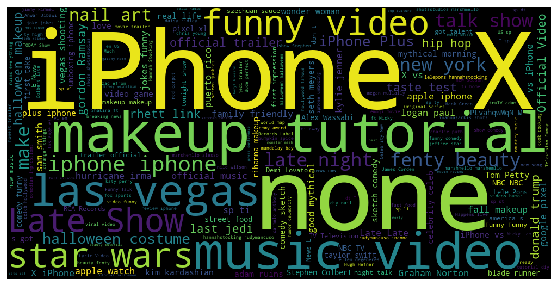

In [46]:
wordcloud = WordCloud(width=1000, height=500, stopwords=set(STOPWORDS)).generate(tags)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis("off")

In [47]:
US_videos.columns

Index(['video_id', 'title', 'channel_title', 'category_id', 'tags', 'views',
       'likes', 'dislikes', 'comment_total', 'thumbnail_link', 'date'],
      dtype='object')

In [43]:
data = df_videos[["views","likes","dislikes"]]
data.head()

views   likes  dislikes
0  4394029  320053      5931
1  7860119  185853     26679
2  5845909  576597     39774
3  2642103   24975      4542
4  1168130   96666       568

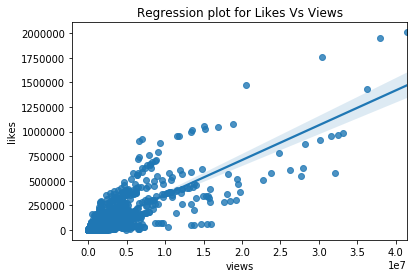

In [47]:
sns.regplot(data=data, x="views", y="likes")
plt.title("Regression plot for Likes Vs Views")
plt.show()

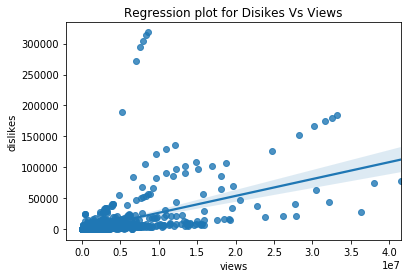

In [48]:
sns.regplot(data=data, x="views", y="dislikes")
plt.title("Regression plot for Disikes Vs Views")
plt.show()

In [49]:
df_corr = df_videos[["views","likes","dislikes"]]

In [50]:
df_corr.corr()

views     likes  dislikes
views     1.000000  0.832844  0.541955
likes     0.832844  1.000000  0.497439
dislikes  0.541955  0.497439  1.000000

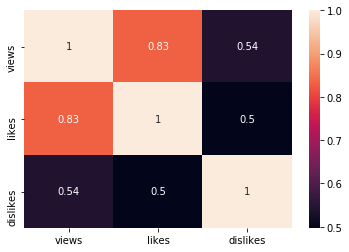

In [56]:
sns.heatmap(df_corr.corr(), annot=True)